Linear regression model: Coefficients = [[-0.01365085  1.04143505]]  intercept = [4.30564464]
 y = -0.013650846917261693 * x**2 + 1.041435054216601 * x + [4.30564464]


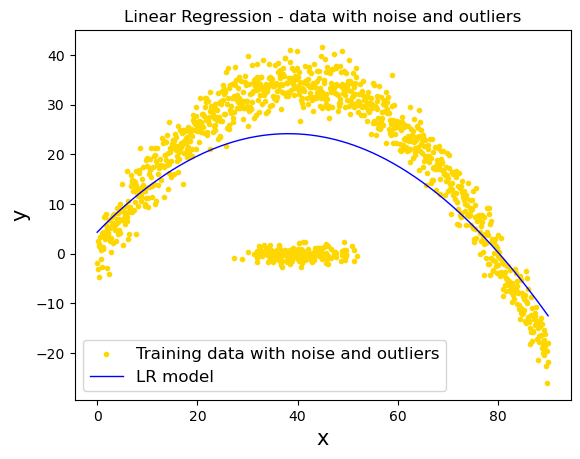

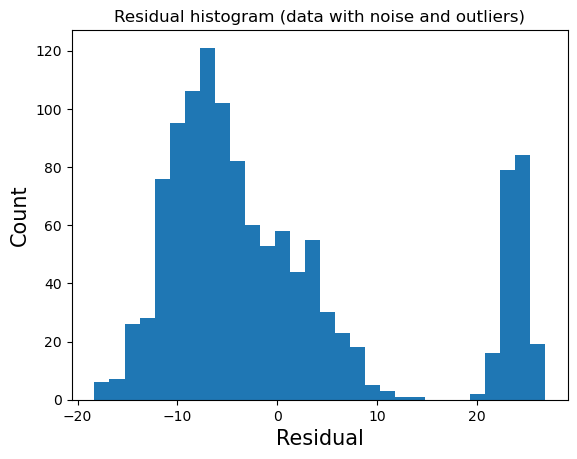

When x = [1600.   40.], y = [24.12169175]


In [118]:
%run LinearRegression_ParabolicTest01.py

In [119]:
from matplotlib import pyplot as plt
import numpy as np
import csv

def ReadCSV(filename):
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        x_mylist = []
        y_mylist = []
        for row in csv_reader:
            x_mylist.append( float(row[0]) )
            y_mylist.append( float(row[1]) )
    return x_mylist, y_mylist

# ******************
_x, _y = ReadCSV('ParabolaWithNoiseOutlier.csv')
number_of_samples = len(_x)
x_pos = np.array(_x)
x_pos = x_pos.reshape(number_of_samples, 1)
y_pos = np.array(_y)
y_pos = y_pos.reshape(number_of_samples, 1)

# *************************** 

t1 = x_pos ** 2
t1 = t1.reshape(number_of_samples, 1)
t2 = x_pos.reshape(number_of_samples, 1)
K = np.concatenate( (t1, t2), axis=1 )

In [120]:
# Feat: RANSAC
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor().fit(K, y_pos)
print( f'RANSAC regression model (with noise and outliers): Coefficients = {ransac.estimator_.coef_}  intercept = {ransac.estimator_.intercept_}' )
# s=ut+(1/2)at^2
print( f's = {ransac.estimator_.intercept_} * t + (1/2) {ransac.estimator_.coef_[0]} * t^2' )

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

RANSAC regression model (with noise and outliers): Coefficients = [[-0.021872  1.74762 ]]  intercept = [-0.47354561]
s = [-0.47354561] * t + (1/2) [-0.021872  1.74762 ] * t^2


Linear regression model: Coefficients = [[-0.021872  1.74762 ]]  intercept = [-0.47354561]
 y = -0.021871997254014522 * x**2 + 1.7476199978202116 * x + [-0.47354561]


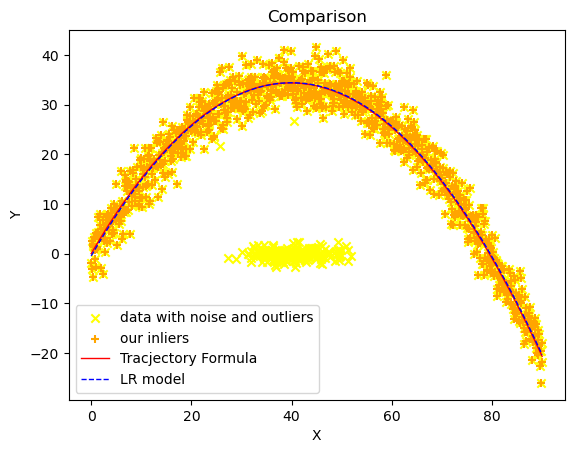

In [121]:
# Extract all the inlier points using the inlier_mask produced by RANSACRegressor
our_inlier_x = x_pos[ inlier_mask ]
our_inlier_y = y_pos[ inlier_mask ]

number_of_samples = len(our_inlier_x)
inlier_t1 = our_inlier_x ** 2
inlier_t1 = inlier_t1.reshape(number_of_samples, 1)
inlier_t2 = our_inlier_x.reshape(number_of_samples, 1)
inlier_K = np.concatenate( (inlier_t1, inlier_t2), axis=1 )

# ******************************
# Use linear regressor to fit a line with our inliers
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(inlier_K, our_inlier_y)

print( f'Linear regression model: Coefficients = {reg.coef_}  intercept = {reg.intercept_}' )
print( f' y = {reg.coef_[0][0]} * x**2 + {reg.coef_[0][1]} * x + {reg.intercept_}' )
# ******************************
#Draw the fitted curve
min_x = min(our_inlier_x)
max_x = max(our_inlier_x)
numOfPoint = 3*len(our_inlier_x)
temp_x = np.linspace(min_x, max_x, num = numOfPoint)
xpoints = temp_x.reshape(numOfPoint, 1)
xxpoints = xpoints ** 2
H = np.concatenate( (xxpoints, xpoints), axis=1)
prediction = reg.predict(H)

plt.scatter(
   x_pos, y_pos, color="yellow", marker="x", label="data with noise and outliers"
)

plt.scatter(
   our_inlier_x, our_inlier_y, color="orange", marker="+", label="our inliers"
)

# plot the true theoretical trajectory mode (y = x * tan(theta) - (g * x^2) / (2 * v0^2 * cos(theta)^2)))
v0 = 30
g = 9.81
theta = 60
plt.plot(xpoints, xpoints * np.tan(np.radians(theta)) - (g * xpoints**2) / (2 * v0**2 * np.cos(np.radians(theta))**2), color="red", linewidth=1, label="Tracjectory Formula")

# def y(x_true, theta_true, g_true, v0_true):
#    return x_true * np.tan(theta_true) - (g_true * x_true**2) / (2 * v0_true**2 * np.cos(theta_true)**2)
# plt.plot(xpoints, y(np.concatenate( (xxpoints, xpoints), axis=1), np.radians(45), 9.81, 10), color="green", linewidth=1, label="True model")

plt.plot(xpoints, prediction, color="blue", linewidth=1, label="LR model", linestyle='dashed')
plt.legend(loc='lower left')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison')
plt.show()

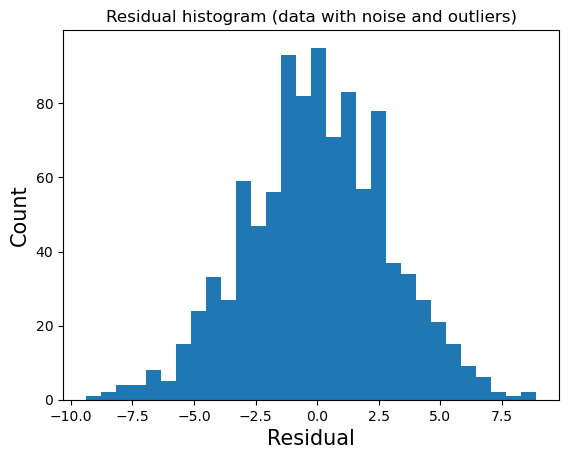

In [122]:
prediction = reg.predict( inlier_K )
residual = prediction - our_inlier_y
plt.hist(residual, bins=30)
plt.xlabel('Residual', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Residual histogram (data with noise and outliers)')
plt.show()

In [123]:
# Predict y value given x value of User Input xxxxxxxxxxxx40.0
x_value = int(input('Enter x value: '))
x_test = np.array([[x_value ** 2, x_value],])
y_result = reg.predict(x_test)

print(f'Prediction: When x = {x_value}, y = {y_result[0][0]}')
print(f'Real value: When x = {x_value}, y = {x_value * np.tan(np.radians(theta)) - (g * x_value**2) / (2 * v0**2 * np.cos(np.radians(theta))**2)}')

Prediction: When x = 40, y = 34.436058694294374
Real value: When x = 40, y = 34.40203230275509


In [126]:
# make predicion and real value into pandas dataframe for comparison
import pandas as pd
for i in range(0,86):
    x_test = np.array([[i ** 2, i],])
    y_result = reg.predict(x_test)
    y_real = i * np.tan(np.radians(theta)) - (g * i**2) / (2 * v0**2 * np.cos(np.radians(theta))**2)
    if i == 0:
        df = pd.DataFrame({'x': [i], 'y_pred': [y_result[0][0]], 'y_real': [y_real]})
    else:
        df = pd.concat([df, pd.DataFrame({'x': [i], 'y_pred': [y_result[0][0]], 'y_real': [y_real]})])
df.set_index('x', inplace=True)
# display whole dataframe
print(df.to_string())
df.to_csv('comparison.csv')

       y_pred     y_real
x                       
0   -0.473546   0.000000
1    1.252202   1.710251
2    2.934206   3.376902
3    4.572466   4.999952
4    6.166982   6.579403
5    7.717754   8.115254
6    9.224782   9.607505
7   10.688067  11.056156
8   12.107607  12.461206
9   13.483403  13.822657
10  14.815455  15.140508
11  16.103763  16.414759
12  17.348327  17.645410
13  18.549147  18.832460
14  19.706223  19.975911
15  20.819555  21.075762
16  21.889143  22.132013
17  22.914987  23.144664
18  23.897087  24.113715
19  24.835443  25.039165
20  25.730055  25.921016
21  26.580924  26.759267
22  27.388048  27.553918
23  28.151428  28.304969
24  28.871064  29.012419
25  29.546956  29.676270
26  30.179104  30.296521
27  30.767508  30.873172
28  31.312168  31.406223
29  31.813085  31.895673
30  32.270257  32.341524
31  32.683685  32.743775
32  33.053369  33.102426
33  33.379309  33.417477
34  33.661505  33.688927
35  33.899958  33.916778
36  34.094666  34.101029
37  34.245630  34.241680
